## Evaluation of Diagnostic Models

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from assignments.C1_W2 import util as util

In [4]:
train_results = pd.read_csv("assignments/C1_W2/train_preds.csv")
valid_results = pd.read_csv("assignments/C1_W2/valid_preds.csv")

class_labels = [
    "Cardiomegaly",
    "Emphysema",
    "Effusion",
    "Hernia",
    "Infiltration",
    "Mass",
    "Nodule",
    "Atelectasis",
    "Pneumothorax",
    "Pleural_Thickening",
    "Pneumonia",
    "Fibrosis",
    "Edema",
    "Consolidation"
]

pred_labels = [l + "_pred" for l in class_labels]

In [5]:
valid_results.head()

,Unnamed: 0,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,...,Infiltration_pred,Mass_pred,Nodule_pred,Atelectasis_pred,Pneumothorax_pred,Pleural_Thickening_pred,Pneumonia_pred,Fibrosis_pred,Edema_pred,Consolidation_pred
0,1685,00008522_004.png,0,0,0,0,0,0,0,0,...,0.256020,0.266928,0.312440,0.460342,0.079453,0.271495,0.276861,0.398799,0.015867,0.156320
1,1919,00009813_000.png,0,0,0,0,0,0,0,0,...,0.382199,0.176825,0.465807,0.489424,0.084595,0.377318,0.363582,0.638024,0.025948,0.144419
2,2048,00010344_000.png,0,0,0,0,0,0,0,0,...,0.427727,0.115513,0.249030,0.035105,0.238761,0.167095,0.166389,0.262463,0.007758,0.125790
3,21,00000242_003.png,0,0,0,0,0,0,0,0,...,0.158596,0.259460,0.334870,0.266489,0.073371,0.229834,0.191281,0.344348,0.008559,0.119153
4,503,00002529_016.png,0,0,0,0,0,0,0,0,...,0.536762,0.198797,0.273110,0.186771,0.242122,0.309786,0.411771,0.244666,0.126930,0.342409


In [6]:
train_results.head()

,Unnamed: 0,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,...,Infiltration_pred,Mass_pred,Nodule_pred,Atelectasis_pred,Pneumothorax_pred,Pleural_Thickening_pred,Pneumonia_pred,Fibrosis_pred,Edema_pred,Consolidation_pred
0,28333,00008270_015.png,0,0,0,0,0,0,0,0,...,0.531233,0.077701,0.254761,0.071555,0.031860,0.125375,0.259928,0.171520,0.005386,0.079036
1,97164,00029855_001.png,1,0,0,0,1,0,0,0,...,0.530278,0.316036,0.403122,0.801598,0.793361,0.550383,0.497499,0.176103,0.359178,0.698990
2,4236,00001297_000.png,0,0,0,0,0,0,0,0,...,0.253458,0.394017,0.414019,0.426408,0.203794,0.625412,0.371834,0.693987,0.066478,0.258697
3,42962,00012359_002.png,0,0,0,0,0,0,0,0,...,0.261658,0.110398,0.133254,0.061813,0.072169,0.104288,0.160986,0.106231,0.088475,0.124298
4,63927,00017951_001.png,0,0,0,0,0,0,0,0,...,0.346267,0.060365,0.833480,0.045764,0.038951,0.794928,0.145725,0.697777,0.017091,0.192074


In [7]:
y = valid_results[class_labels].values
pred = valid_results[pred_labels].values

In [8]:
valid_results[np.concatenate([class_labels, pred_labels])].head()

,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,...,Infiltration_pred,Mass_pred,Nodule_pred,Atelectasis_pred,Pneumothorax_pred,Pleural_Thickening_pred,Pneumonia_pred,Fibrosis_pred,Edema_pred,Consolidation_pred
0,0,0,0,0,0,0,0,0,0,0,...,0.256020,0.266928,0.312440,0.460342,0.079453,0.271495,0.276861,0.398799,0.015867,0.156320
1,0,0,0,0,1,0,1,0,0,0,...,0.382199,0.176825,0.465807,0.489424,0.084595,0.377318,0.363582,0.638024,0.025948,0.144419
2,0,0,0,0,0,0,0,0,0,0,...,0.427727,0.115513,0.249030,0.035105,0.238761,0.167095,0.166389,0.262463,0.007758,0.125790
3,0,0,0,0,0,0,0,0,0,0,...,0.158596,0.259460,0.334870,0.266489,0.073371,0.229834,0.191281,0.344348,0.008559,0.119153
4,0,0,0,0,0,0,0,0,0,0,...,0.536762,0.198797,0.273110,0.186771,0.242122,0.309786,0.411771,0.244666,0.126930,0.342409


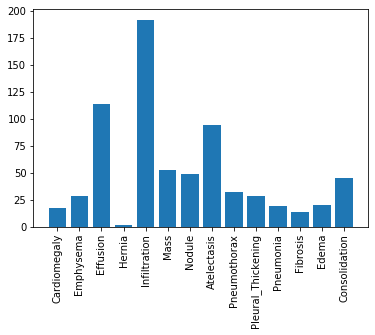

In [9]:
plt.xticks(rotation=90)
plt.bar(x=class_labels, height=y.sum(axis=0))
plt.show()

#### TRUE POSITIVES, FALSE POSITIVES, TRUE NEGATIVES, FALSE NEGATIVES
- **TRUE POSITIVE (TP)** - model classifies the example as positive, and the actual label also is positive.
- **FALSE POSITIVE (FP)** - model classifies the example as positive, **but** the actual label also is negative.
- **TRUE NEGATIVE (TN)** - model classifies the example as negative, and the actual label also is negative.
- **FALSE NEGATIVE (FN)** - model classifies the example as negative, **but** the actual label also is positive.

In [10]:
def true_positives(y, pred, th=0.5):
    TP = 0
    
    thresholded_preds = pred >= th
    
    TP = np.sum((y == 1) & (thresholded_preds == 1))
    
    return TP

def false_positives(y, pred, th=0.5):
    FP = 0
    
    thresholded_preds = pred >= th
    
    FP = np.sum((y == 1) & (thresholded_preds == 0))
    
    return FP

def true_negatives(y, pred, th=0.5):
    TN = 0
    
    thresholded_preds = pred >= th
    
    TN = np.sum((y == 0) & (thresholded_preds == 0))
    
    return TN

def false_negatives(y, pred, th=0.5):
    FN = 0
    
    thresholded_preds = pred >= th
    
    FN = np.sum((y == 0) & (thresholded_preds == 1))
    
    return FN

In [11]:
util.get_performance_metrics(y, pred, class_labels)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Emphysema,20,869,103,8,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Effusion,99,690,196,15,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Hernia,1,743,255,1,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Infiltration,114,543,265,78,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Mass,40,789,158,13,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Nodule,28,731,220,21,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Atelectasis,64,657,249,30,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Pneumothorax,24,785,183,8,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5


#### ACCURACY

$$accuracy = \frac{\text{true positives} + \text{true negatives}}{\text{true positives} + \text{true negatives} + \text{false positives} + \text{false negatives}}$$

In [12]:
def get_accuracy(y, pred, th=0.5):
    accuracy = 0.
    
    TP = true_positives(y, pred, th)
    FP = false_positives(y, pred, th)
    TN = true_negatives(y, pred, th)    
    FN = false_negatives(y, pred, th)    

    accuracy = (TP + TN) / (TP + FP + TN + FN)
    
    return accuracy

In [13]:
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,0.83,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Emphysema,20,869,103,8,0.889,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Effusion,99,690,196,15,0.789,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Hernia,1,743,255,1,0.744,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Infiltration,114,543,265,78,0.657,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Mass,40,789,158,13,0.829,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Nodule,28,731,220,21,0.759,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Atelectasis,64,657,249,30,0.721,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Pneumothorax,24,785,183,8,0.809,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5


If we were to judge our model's performance based on the accuracy metric, we would say that our model is not verey accurate for detectng the `Infiltration` cases (accuracy of 0.657), but pretty accurate for detecting `Emhysema` (accuracy of 0.889).
**But is that really the case?**
Let's imagine a model that simply predicts that any patient does **NOT** have `Emphysema`, regardless of patient's measurements.

Let's calculate the accuracy for such a model.

In [14]:
get_accuracy(valid_results["Emphysema"].values, np.zeros(len(valid_results)))

0.972

As seen above, such a model would be 97% accurate.

But is this really a good model? Wouldn't this model be wrong 100% of the time, if the patient actually had this condition?

#### PREVALENCE
- In a medical context, prevalence is the proportion of people in the population, who have the disease (or condition, etc)
- In machine learning terms, this is the proportion of positive examples. The formula is:

$$prevalence = \frac{1}{N} \sum_{i} y_i$$

where $y_i = 1$ when the example is 'positive' (has the disease).

In [15]:
def get_prevalence(y):
    prevalence = 0.
    
    prevalence = (1 / len(y)) * np.sum(y)
    
    return prevalence

In [16]:
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,0.83,0.017,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Emphysema,20,869,103,8,0.889,0.028,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Effusion,99,690,196,15,0.789,0.114,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Hernia,1,743,255,1,0.744,0.002,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Infiltration,114,543,265,78,0.657,0.192,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Mass,40,789,158,13,0.829,0.053,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Nodule,28,731,220,21,0.759,0.049,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Atelectasis,64,657,249,30,0.721,0.094,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Pneumothorax,24,785,183,8,0.809,0.032,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5


`Hernia` has a prevalence 0.002, which is the rarest among the studied conditions in our dataset.

#### SENSITIVITY AND SPECIFICITY
- **SENSITIVITY** - probability that our test outputs are positive, given that the case is actually positive
- **SPECIFICITY** - probability that the tet outputs are negative, given that the case is actually negative

$$sensitivity = \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$$

$$specificity = \frac{\text{true negatives}}{\text{true negatives} + \text{false positives}}$$

In [17]:
def get_sensitivity(y, pred, th=0.5):
    sensitivity = 0.
    
    TP = true_positives(y, pred, th)
    FN = false_negatives(y, pred, th)
    
    sensitivity = TP / (TP+FN)
    
    return sensitivity

def get_specificity(y, pred, th=0.5):
    specificity = 0.
    
    TN = true_negatives(y, pred, th)
    FP = false_positives(y, pred, th)
    
    specificity = TN / (TN + FP)
    
    return specificity

In [18]:
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence,
                            sens=get_sensitivity, spec=get_specificity)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,0.83,0.017,0.086,0.999,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Emphysema,20,869,103,8,0.889,0.028,0.163,0.991,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Effusion,99,690,196,15,0.789,0.114,0.336,0.979,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Hernia,1,743,255,1,0.744,0.002,0.004,0.999,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Infiltration,114,543,265,78,0.657,0.192,0.301,0.874,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Mass,40,789,158,13,0.829,0.053,0.202,0.984,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Nodule,28,731,220,21,0.759,0.049,0.113,0.972,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Atelectasis,64,657,249,30,0.721,0.094,0.204,0.956,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Pneumothorax,24,785,183,8,0.809,0.032,0.116,0.99,Not Defined,Not Defined,Not Defined,Not Defined,0.5


It's worth noting, that specificity and sensitivity don't depend on the prevalence of the poitive class in the dataset.
- this is because the staticstics are only computed within people of the same class
- sensitivity only considers output on people in the positive class
- specificity only considers output on people in the negative class

#### PPV AND NPV

Diagnosticallt sensitivity and specificity are not helpful.

Sensitivity for example tells us the probability our test outputs are positive, given that the person already has the condition. Here we are conditioning on the thing we would like to find out (whether the patient has the condition).

What would be more helpful is the probability that the person has the disease given that our test outputs are positive. 

That brings the positive predictive value (PPV) and negative predictive value (NPV)
- **Positive Predictive Value (PPV)** is the probability that subjects with a positive screening test truly have the disease
- **Negative Predictive Value (NPV)** is the probability, that subjects with a negative screening test truly don;t havr the disease


$$PPV = \frac{\text{true positives}}{\text{true positives} + \text{false positives}}$$ 

$$NPV = \frac{\text{true negatives}}{\text{true negatives} + \text{false negatives}}$$


In [19]:
def get_ppv(y, pred, th=0.5):
    PPV = 0.
    
    TP = true_positives(y, pred, th)
    FP = false_positives(y, pred, th)
    
    PPV = TP / (TP + FP)
    
    return PPV

def get_npv(y, pred, th=0.5):
    NPV = 0.
    
    TN = true_negatives(y, pred, th)
    FN = false_negatives(y, pred, th)
    
    NPV = TN / (TN + FN)
    
    return NPV

In [20]:
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence,
                            sens=get_sensitivity, spec=get_specificity, ppv=get_ppv, npv=get_npv)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,0.83,0.017,0.086,0.999,0.941,0.828,Not Defined,Not Defined,0.5
Emphysema,20,869,103,8,0.889,0.028,0.163,0.991,0.714,0.894,Not Defined,Not Defined,0.5
Effusion,99,690,196,15,0.789,0.114,0.336,0.979,0.868,0.779,Not Defined,Not Defined,0.5
Hernia,1,743,255,1,0.744,0.002,0.004,0.999,0.5,0.744,Not Defined,Not Defined,0.5
Infiltration,114,543,265,78,0.657,0.192,0.301,0.874,0.594,0.672,Not Defined,Not Defined,0.5
Mass,40,789,158,13,0.829,0.053,0.202,0.984,0.755,0.833,Not Defined,Not Defined,0.5
Nodule,28,731,220,21,0.759,0.049,0.113,0.972,0.571,0.769,Not Defined,Not Defined,0.5
Atelectasis,64,657,249,30,0.721,0.094,0.204,0.956,0.681,0.725,Not Defined,Not Defined,0.5
Pneumothorax,24,785,183,8,0.809,0.032,0.116,0.99,0.75,0.811,Not Defined,Not Defined,0.5


Notice that despite having very high sensitivity and accuracy, the PPV of the predictions could still be very low.

This is the case with `Edema` for example.
- the sensitivity is 0.75.
- however, given the model predicted positive, the probability that a person has Edema (its PPV) is only 0.066

#### ROC CURVE

ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 

The ideal point is at the top left, with a true positivie rate of 1 and a false positive rate of 0. The various points on the curve are generated by gradually changing the threshold.

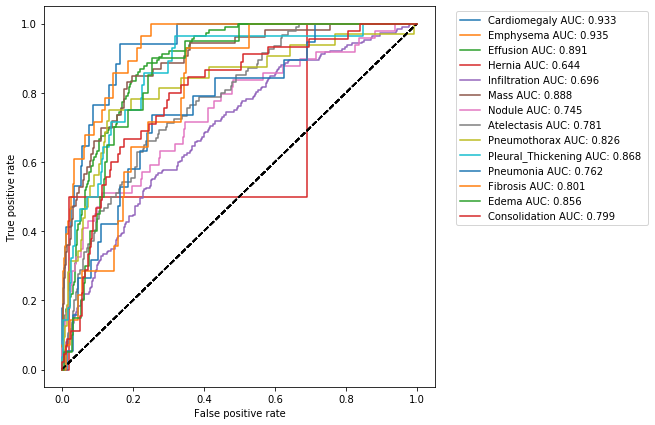

In [21]:
util.get_curve(y, pred, class_labels)

In [22]:
from sklearn.metrics import roc_auc_score

util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence,
                            sens=get_sensitivity, spec=get_specificity, ppv=get_ppv, npv=get_npv)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,0.83,0.017,0.086,0.999,0.941,0.828,Not Defined,Not Defined,0.5
Emphysema,20,869,103,8,0.889,0.028,0.163,0.991,0.714,0.894,Not Defined,Not Defined,0.5
Effusion,99,690,196,15,0.789,0.114,0.336,0.979,0.868,0.779,Not Defined,Not Defined,0.5
Hernia,1,743,255,1,0.744,0.002,0.004,0.999,0.5,0.744,Not Defined,Not Defined,0.5
Infiltration,114,543,265,78,0.657,0.192,0.301,0.874,0.594,0.672,Not Defined,Not Defined,0.5
Mass,40,789,158,13,0.829,0.053,0.202,0.984,0.755,0.833,Not Defined,Not Defined,0.5
Nodule,28,731,220,21,0.759,0.049,0.113,0.972,0.571,0.769,Not Defined,Not Defined,0.5
Atelectasis,64,657,249,30,0.721,0.094,0.204,0.956,0.681,0.725,Not Defined,Not Defined,0.5
Pneumothorax,24,785,183,8,0.809,0.032,0.116,0.99,0.75,0.811,Not Defined,Not Defined,0.5


####  Confidence Intervals

In [23]:
def bootstrap_auc(y, pred, classes, bootstraps=100, fold_size=1000):
    statistics = np.zeros((len(classes), bootstraps))
    for c in range(len(classes)):
        df = pd.DataFrame(columns=["y", "pred"])
        df.loc[:, "y"] = y[:, c]
        df.loc[:, "pred"] = pred[:, c]
        
        df_pos = df[df.y == 1]
        df_neg = df[df.y == 0]
        
        prevalence = len(df_pos) / len(df)
        
        for i in range(bootstraps):
            pos_sample = df_pos.sample(n=int(fold_size * prevalence), replace=True)
            neg_sample = df_neg.sample(n=int(fold_size * (1-prevalence)), replace=True)
            
            y_sample = np.concatenate([pos_sample.y.values, neg_sample.y.values])
            pred_sample =np.concatenate([pos_sample.pred.values, neg_sample.pred.values])
            score = roc_auc_score(y_sample, pred_sample)
            statistics[c][i] = score
        return statistics
statistics = bootstrap_auc(y, pred, class_labels)

In [24]:
util.print_confidence_intervals(class_labels, statistics)

,Mean AUC (CI 5%-95%)
Cardiomegaly,0.93 (0.90-0.96)
Emphysema,0.00 (0.00-0.00)
Effusion,0.00 (0.00-0.00)
Hernia,0.00 (0.00-0.00)
Infiltration,0.00 (0.00-0.00)
Mass,0.00 (0.00-0.00)
Nodule,0.00 (0.00-0.00)
Atelectasis,0.00 (0.00-0.00)
Pneumothorax,0.00 (0.00-0.00)
Pleural_Thickening,0.00 (0.00-0.00)


#### F1 Score

F1 score is the harmonic mean of the precision and recall, whene an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

In [25]:
from sklearn.metrics import f1_score

util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence,
                             sens=get_sensitivity, spec=get_specificity, ppv=get_ppv, npc=get_npv,
                             auc=roc_auc_score, f1=f1_score)

TypeError: get_performance_metrics() got an unexpected keyword argument 'npc'

#### Calibration

In [26]:
from sklearn.calibration import calibration_curve

def plot_calibration_curve(y, pred):
    plt.figure(figsize=(20, 20))
    for i in range(len(class_labels)):
        plt.subplot(4, 4, i+1)
        fraction_of_positives, mean_predicted_value = calibration_curve(y[:, i], pred[:, i], n_bins=20)
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.plot(mean_predicted_value, fraction_of_positives, marker=".")
        plt.xlabel("Predicted Value")
        plt.ylabel("Fraction of Positives")
        plt.title(class_labels[i])
    plt.tight_layout()
    plt.show()

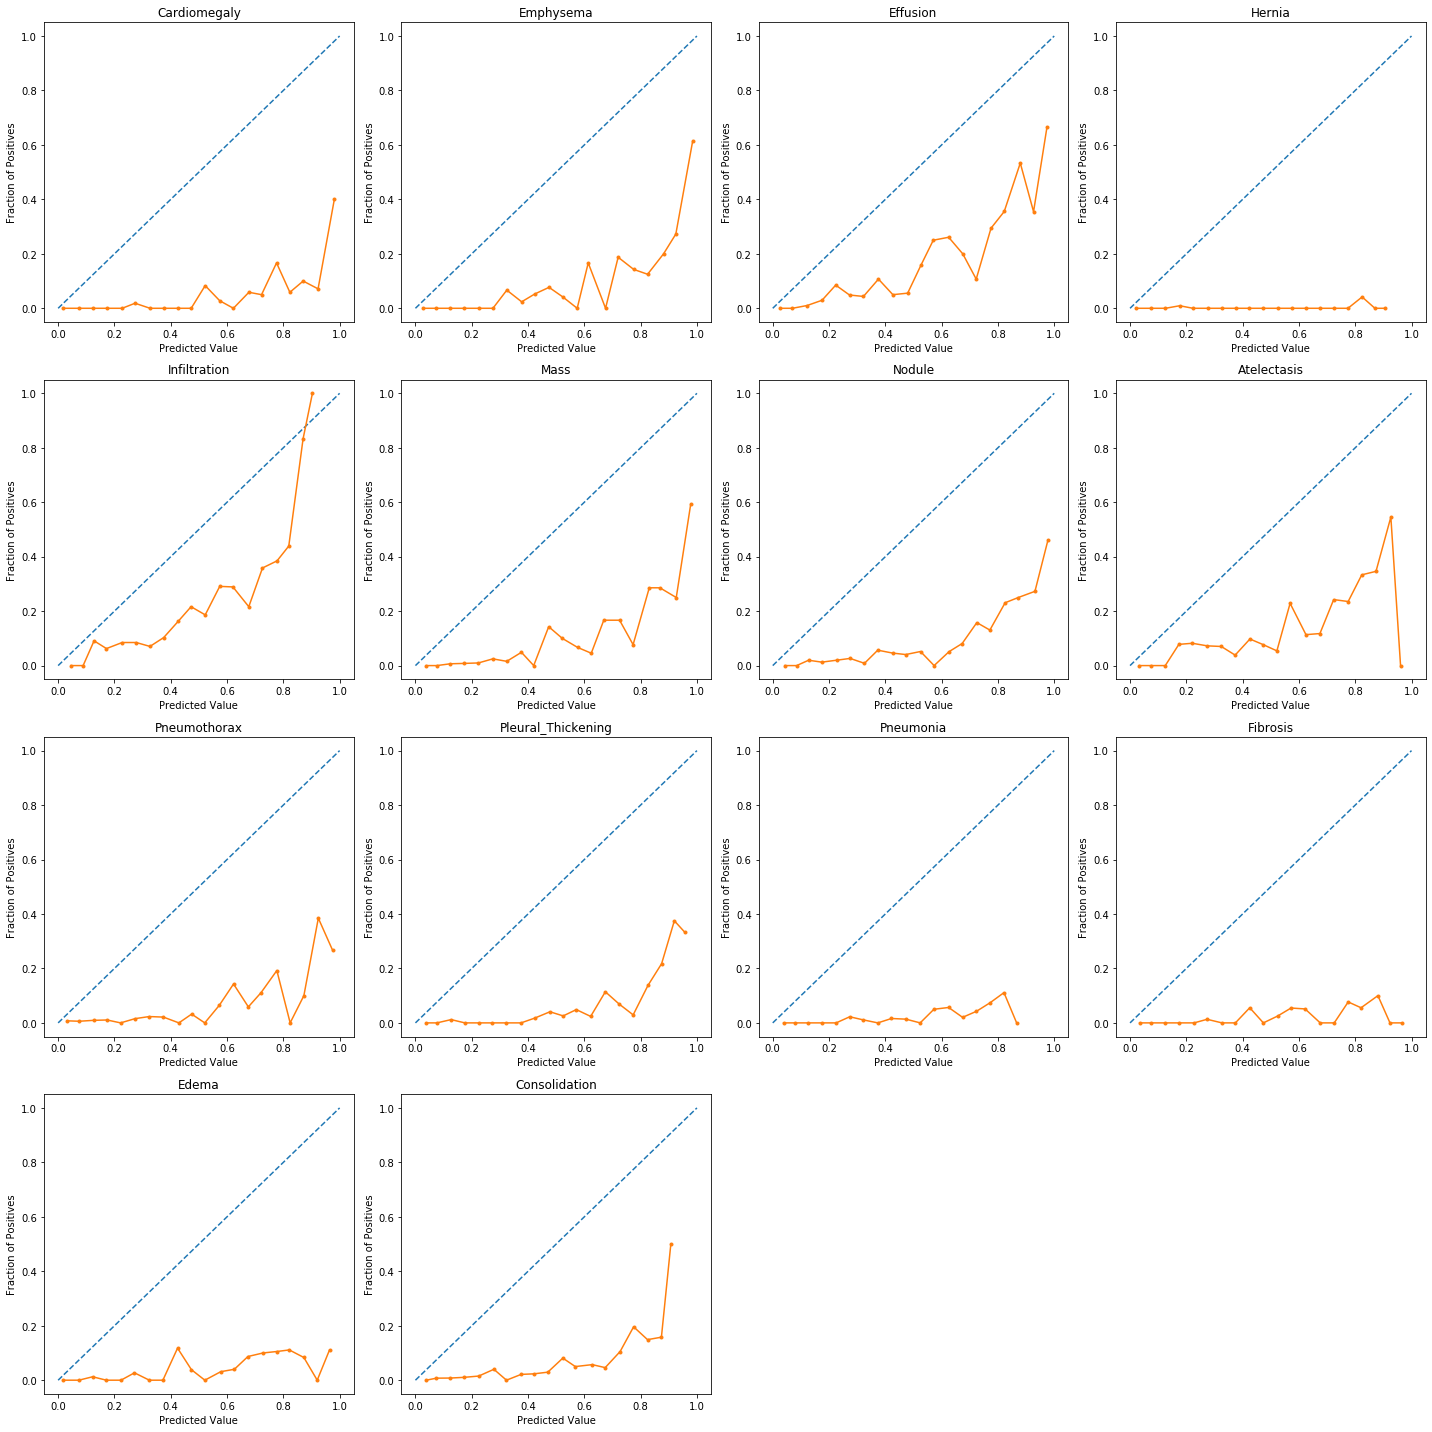

In [27]:
plot_calibration_curve(y, pred)

In [28]:
from sklearn.linear_model import LogisticRegression as LR

y_train = train_results[class_labels].values
pred_train = train_results[pred_labels].values
pred_calibrated = np.zeros_like(pred)

for i in range(len(class_labels)):
    lr = LR(solver="liblinear", max_iter=10000)
    lr.fit(pred_train[:, i].reshape(-1, 1), y_train[:, i])
    pred_calibrated[:, i] = lr.predict_proba(pred[:, i].reshape(-1, 1))[:, 1]

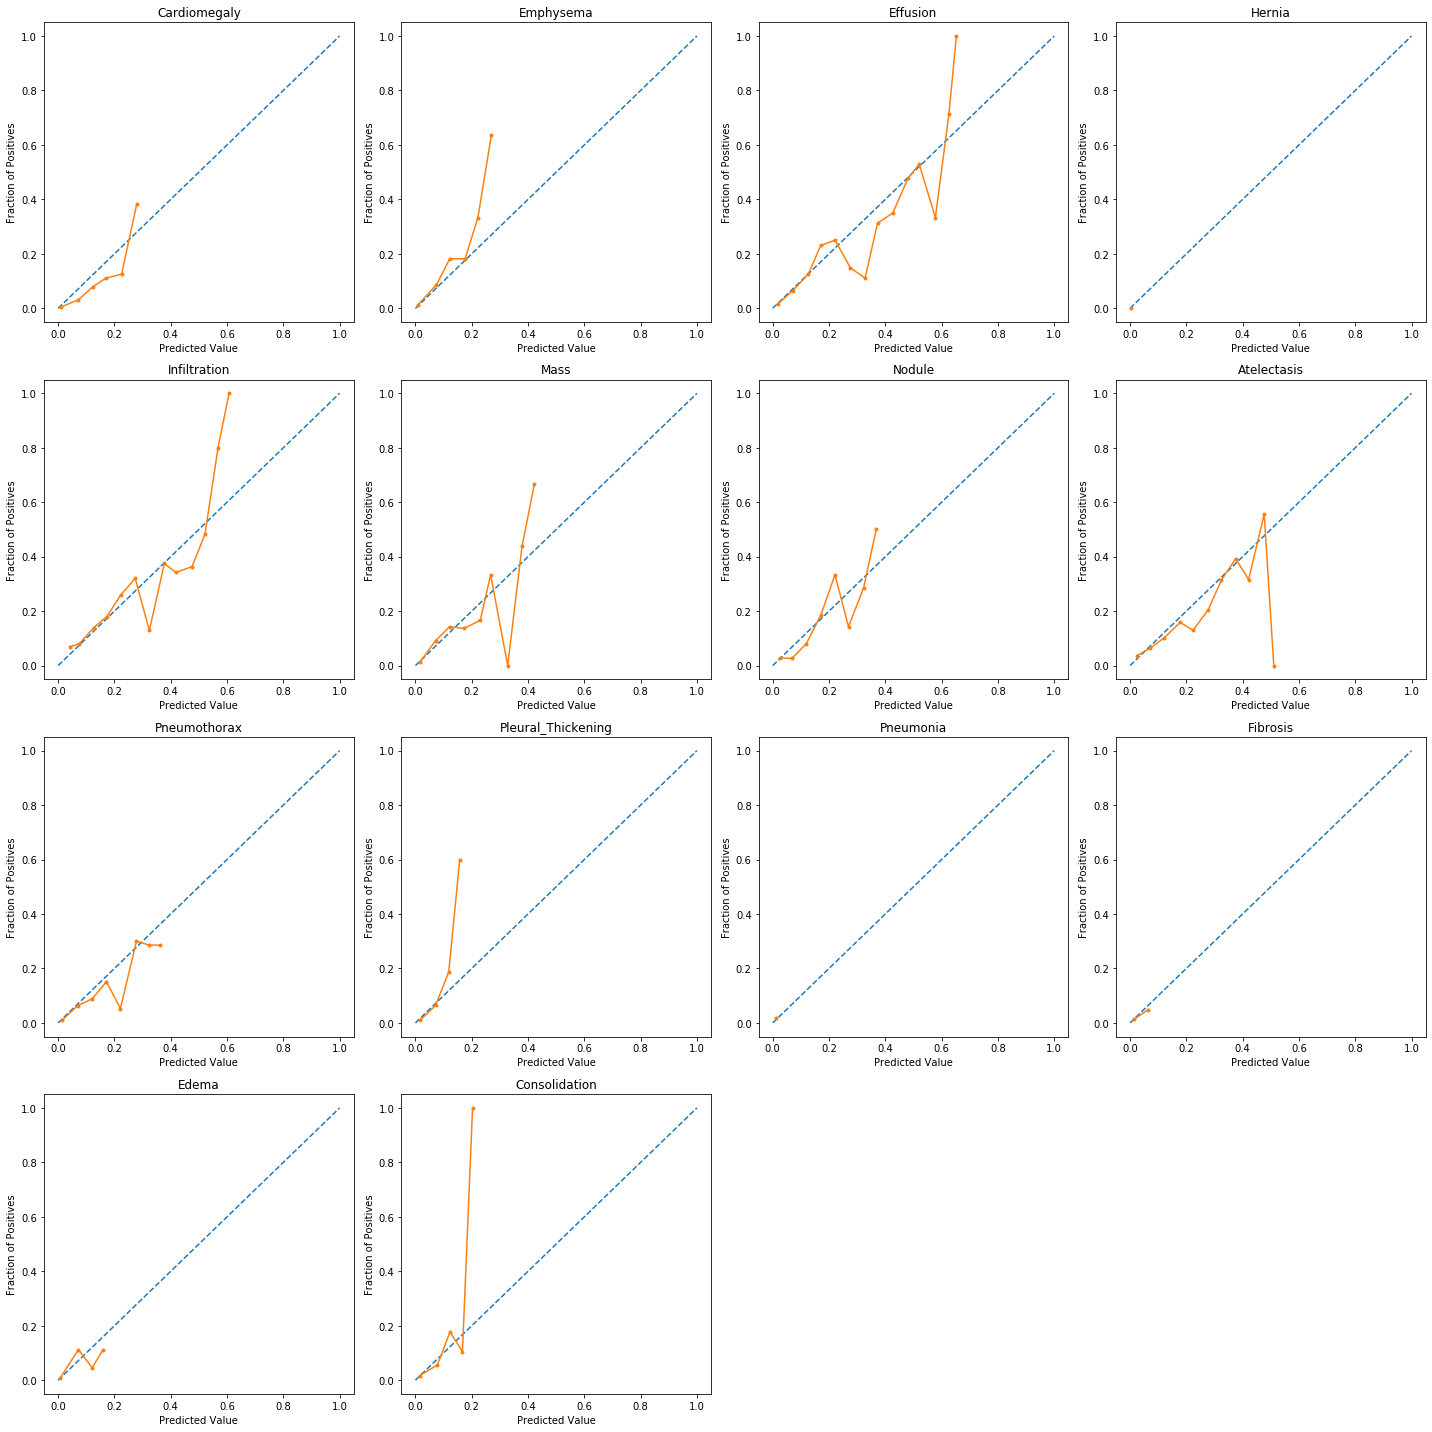

In [30]:
plot_calibration_curve(y[:, ], pred_calibrated)